# Exploratory Data Analysis

In this section, we're going to investigate some of the data we've collected and see if we can uncover some interesting trends.

Questions that we would like to address:

* 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [97]:
df = pd.read_csv('states_daily_preprocessed.csv')
df.head()

,Unnamed: 0,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,0,2020-09-24,AK,0,0,433198,0
1,1,2020-09-24,AL,1053,6296,1092953,7277
2,2,2020-09-24,AR,1086,9436,919786,10466
3,3,2020-09-24,AS,0,0,1571,0
4,4,2020-09-24,AZ,568,9983,1420417,10551


In [98]:
# Dropping Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

In [99]:
df.head()

,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,2020-09-24,AK,0,0,433198,0
1,2020-09-24,AL,1053,6296,1092953,7277
2,2020-09-24,AR,1086,9436,919786,10466
3,2020-09-24,AS,0,0,1571,0
4,2020-09-24,AZ,568,9983,1420417,10551


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      11466 non-null  object
 1   state                     11466 non-null  object
 2   positiveIncrease          11466 non-null  int64 
 3   negativeIncrease          11466 non-null  int64 
 4   total                     11466 non-null  int64 
 5   totalTestResultsIncrease  11466 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 537.6+ KB


In [110]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      11466 non-null  datetime64[ns]
 1   state                     11466 non-null  object        
 2   positiveIncrease          11466 non-null  int64         
 3   negativeIncrease          11466 non-null  int64         
 4   total                     11466 non-null  int64         
 5   totalTestResultsIncrease  11466 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 537.6+ KB


In [111]:
df2 = df.set_index('date')
df2.head()

,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
date,,,,,
2020-09-24,AK,0,0,433198,0
2020-09-24,AL,1053,6296,1092953,7277
2020-09-24,AR,1086,9436,919786,10466
2020-09-24,AS,0,0,1571,0
2020-09-24,AZ,568,9983,1420417,10551


<AxesSubplot:xlabel='date'>

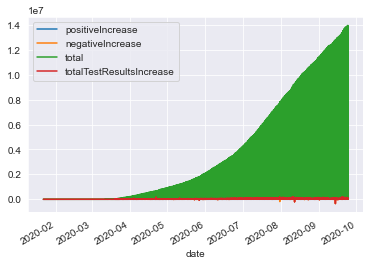

In [112]:
df2.plot()

<AxesSubplot:xlabel='date'>

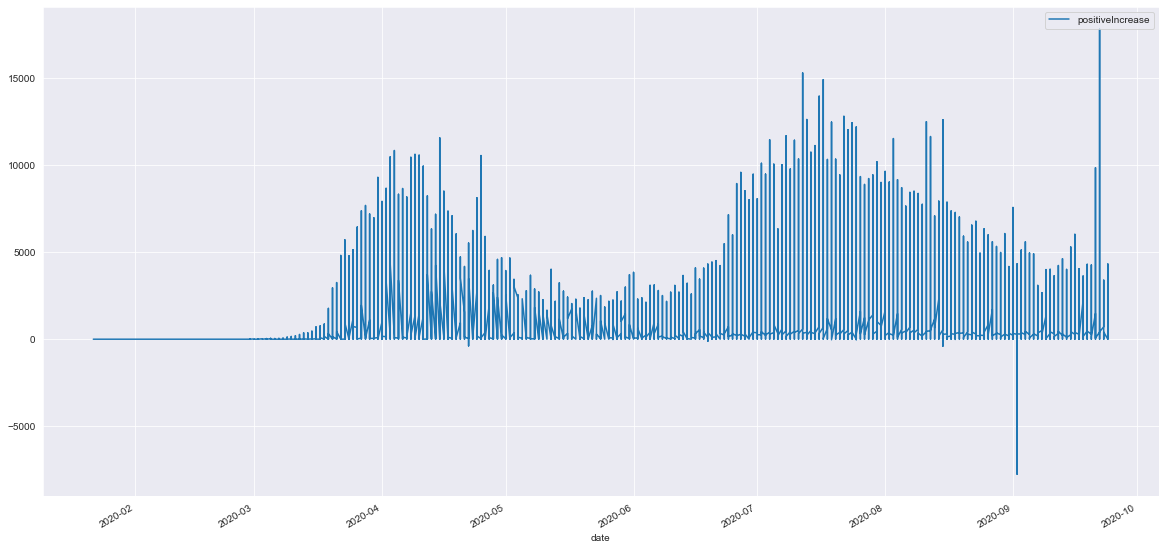

In [114]:
df2_drop = df2.drop(['total', 'negativeIncrease','totalTestResultsIncrease'], 
                    axis=1)
df2_drop.plot(figsize=(20, 10))

In [121]:
states = {}

for state in df2.state.unique():
    key = state 
    value = df[df['state'] == state].set_index('date')
    states[key] = value
    
    
states['WA']

,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
date,,,,,
2020-09-24,WA,509,1888,1743296,2397
2020-09-23,WA,0,0,1740899,0
2020-09-22,WA,645,3698,1740899,4343
2020-09-21,WA,349,13167,1736556,13516
2020-09-20,WA,597,17773,1723040,18370
...,...,...,...,...,...
2020-01-26,WA,0,0,0,0
2020-01-25,WA,0,0,0,0
2020-01-24,WA,0,0,0,0


In [147]:
states.keys().index('AK')

AttributeError: 'dict_keys' object has no attribute 'index'

In [153]:
for key in states:
    print(states[key]['state'][0])
    print(states[key]['total'].max())
    print('--------------------------------------')

AK
433198
--------------------------------------
AL
1092953
--------------------------------------
AR
919786
--------------------------------------
AS
1571
--------------------------------------
AZ
1420417
--------------------------------------
CA
13952857
--------------------------------------
CO
853592
--------------------------------------
CT
1505473
--------------------------------------
DC
367867
--------------------------------------
DE
277916
--------------------------------------
FL
5183500
--------------------------------------
GA
2846192
--------------------------------------
GU
47687
--------------------------------------
HI
286785
--------------------------------------
IA
738580
--------------------------------------
ID
297443
--------------------------------------
IL
5295876
--------------------------------------
IN
1331608
--------------------------------------
KS
492281
--------------------------------------
KY
1233935
--------------------------------------
LA
2237534
--

In [92]:
df_jhu = pd.read_csv('jhu_confirmed_preprocessed')
df_jhu = df_jhu.drop('Unnamed: 0', axis=1)
df_jhu.head()

,Admin2,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20
0,Autauga,Alabama,0,0,0,0,0,0,0,0,...,1673,1690,1691,1714,1715,1738,1757,1764,1773,1785
1,Baldwin,Alabama,0,0,0,0,0,0,0,0,...,5047,5061,5087,5124,5141,5165,5456,5477,5526,5588
2,Barbour,Alabama,0,0,0,0,0,0,0,0,...,830,835,838,848,851,857,873,882,885,886
3,Bibb,Alabama,0,0,0,0,0,0,0,0,...,628,632,636,635,638,642,652,654,656,657
4,Blount,Alabama,0,0,0,0,0,0,0,0,...,1542,1551,1560,1573,1580,1594,1608,1611,1617,1618


In [20]:
# checking number of states and territories
len(df_jhu.Province_State.unique())

58

In [74]:
bama = df[df['Province_State'] == 'Alabama']

bama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Columns: 253 entries, Admin2 to 9/28/20
dtypes: int64(251), object(2)
memory usage: 136.9+ KB


<Figure size 2880x1440 with 0 Axes>

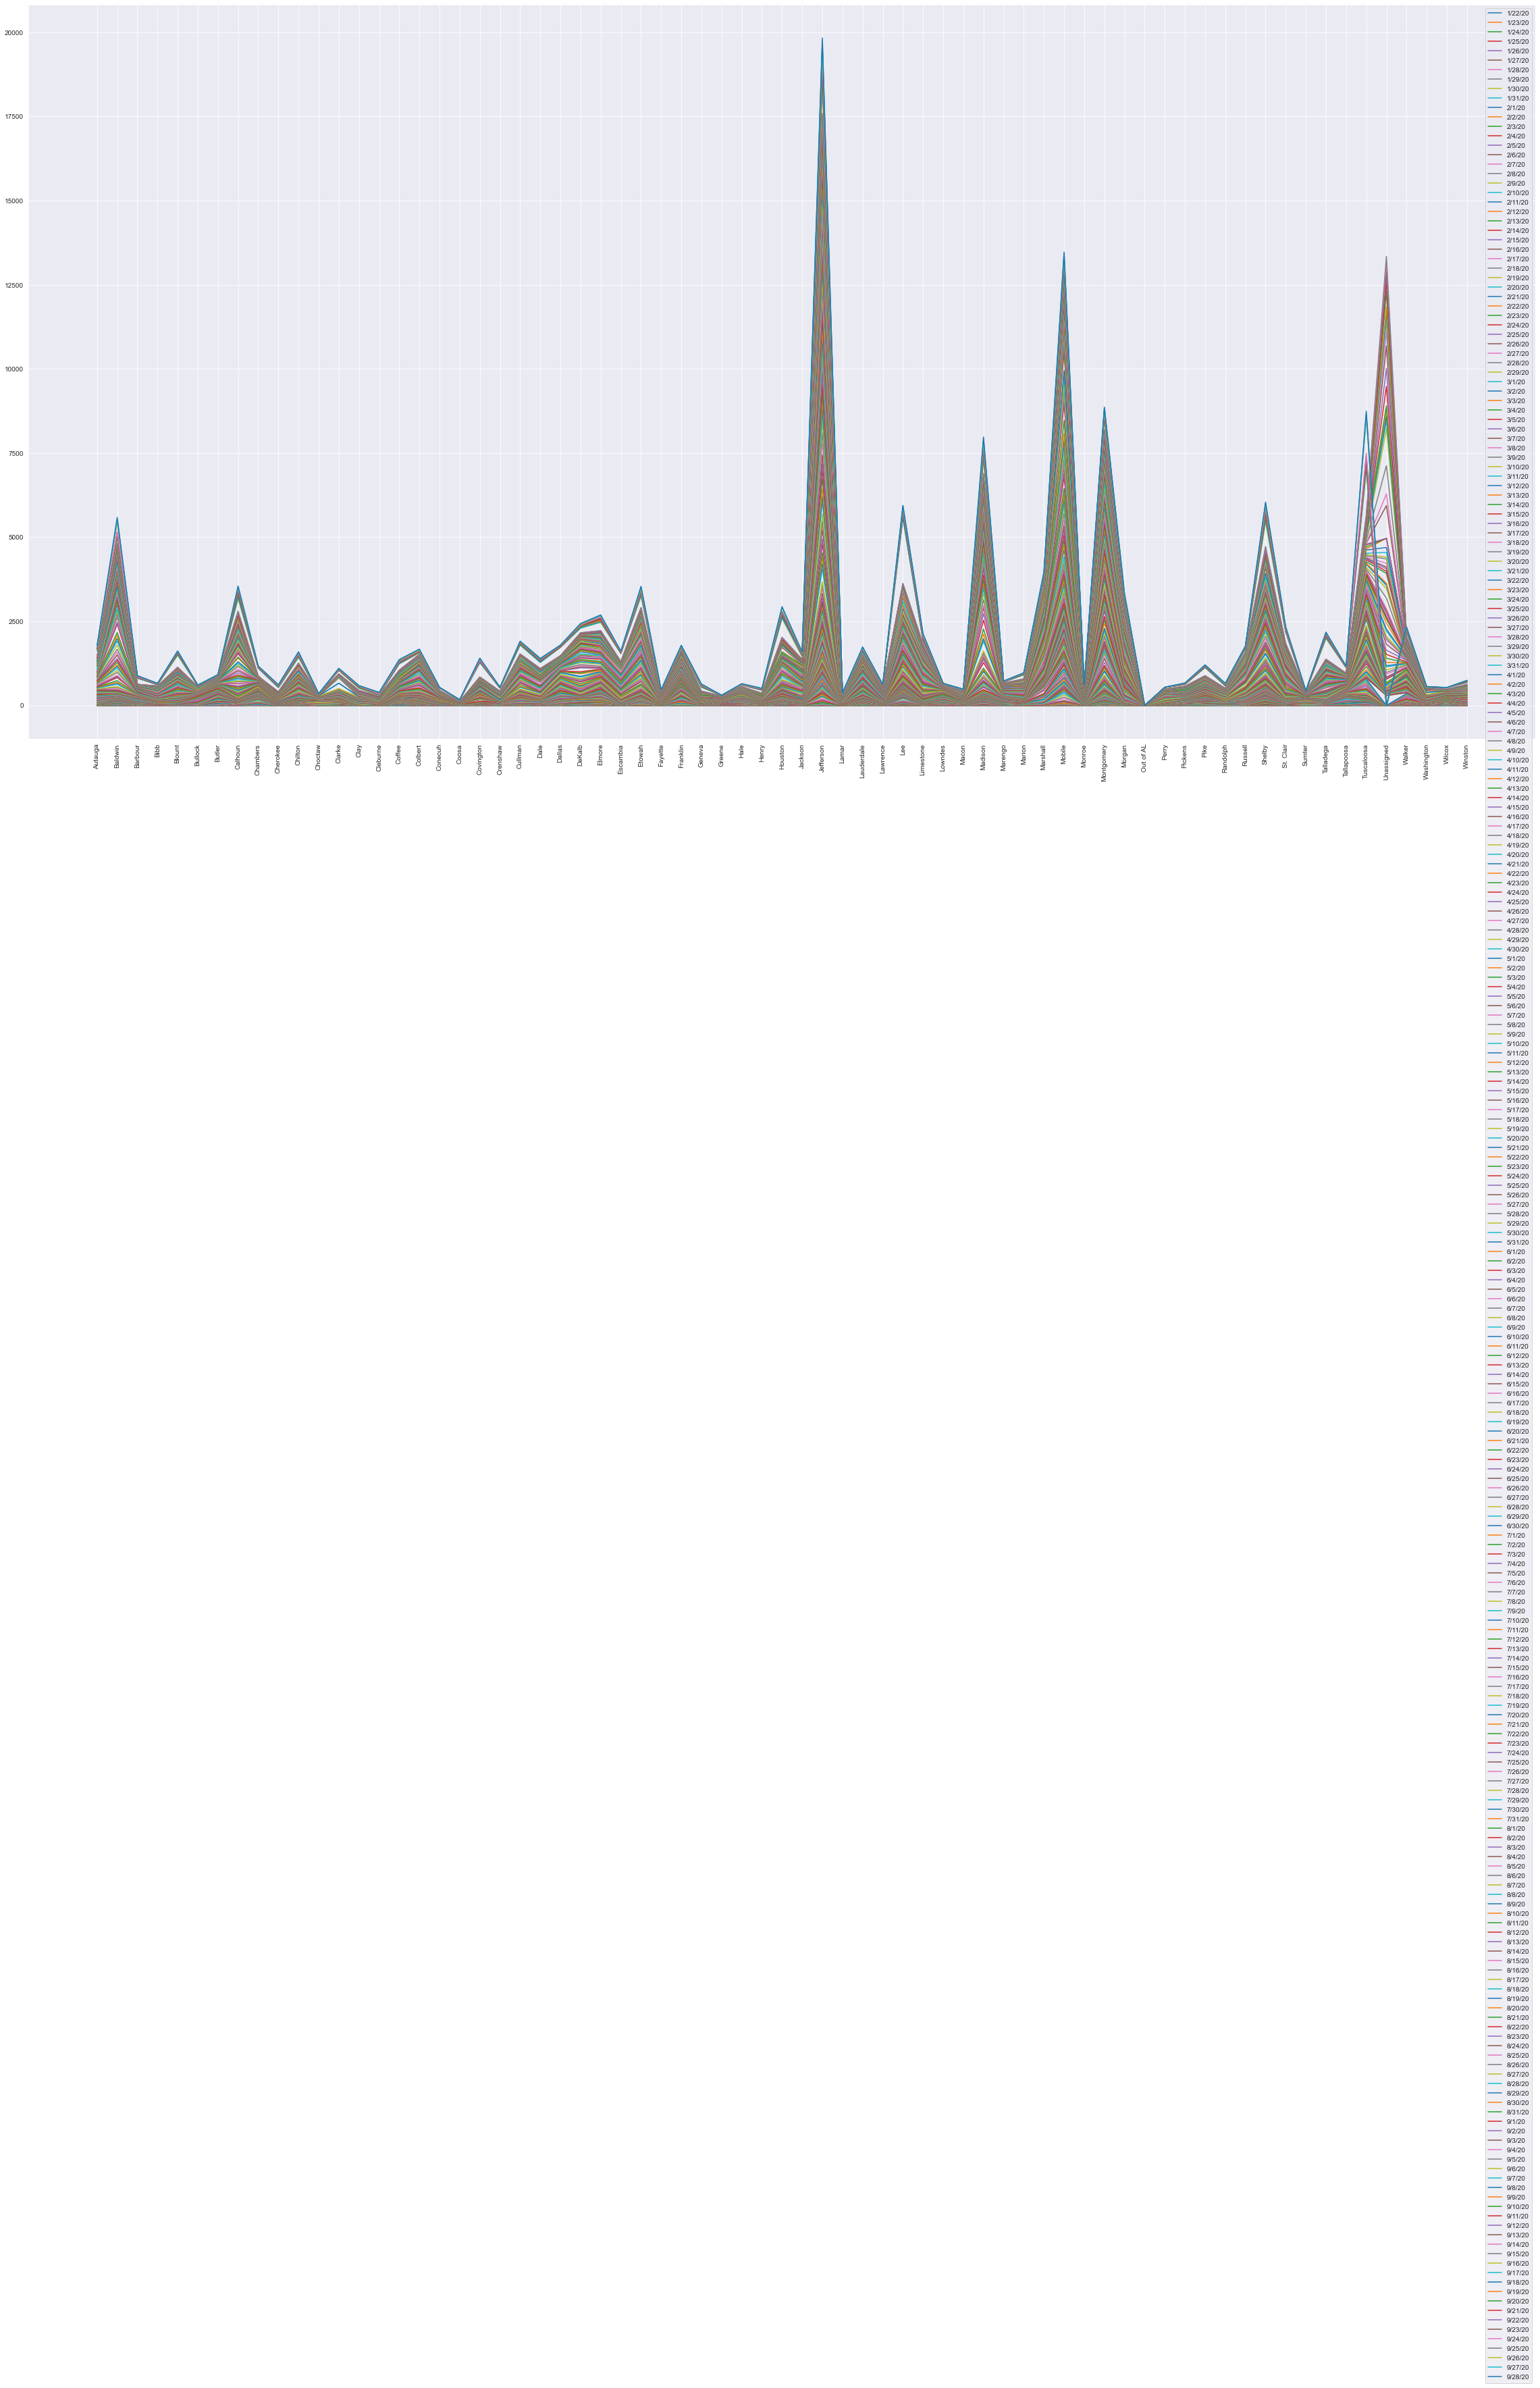

In [84]:
fig = plt.figure(figsize=(40, 20))
bama.plot(figsize=(40, 20))
plt.xticks(ticks=np.arange(0, 69), labels=bama['Admin2'], rotation=90)
plt.show();

In [86]:
jeff = bama[bama['Admin2'] == 'Jefferson']
jeff

,Admin2,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20
36,Jefferson,Alabama,0,0,0,0,0,0,0,0,...,18911,19015,19123,19230,19306,19441,19572,19676,19752,19833


In [93]:
# creating a dataframe that is based on the 
swapped = df_jhu.swapaxes('index', 'columns')
swapped

,0,1,2,3,4,5,6,7,8,9,...,3330,3331,3332,3333,3334,3335,3336,3337,3338,3339
Admin2,Autauga,Baldwin,Barbour,Bibb,Blount,Bullock,Butler,Calhoun,Chambers,Cherokee,...,Park,Platte,Sheridan,Sublette,Sweetwater,Teton,Uinta,Unassigned,Washakie,Weston
Province_State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/24/20,1738,5165,857,642,1594,598,913,3466,1151,591,...,218,25,270,90,328,529,347,0,113,27
9/25/20,1757,5456,873,652,1608,599,916,3499,1161,603,...,227,27,272,95,332,532,348,0,114,35
9/26/20,1764,5477,882,654,1611,604,912,3515,1164,608,...,230,28,275,98,332,536,350,0,114,36
9/27/20,1773,5526,885,656,1617,606,913,3534,1168,612,...,236,28,289,97,335,554,352,0,115,36


In [94]:
df_jhu.iloc[:,1]

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3335    Wyoming
3336    Wyoming
3337    Wyoming
3338    Wyoming
3339    Wyoming
Name: Province_State, Length: 3340, dtype: object

In [95]:
columns_list = []
for val in range(len(swapped.iloc[1])):
    columns_list.append(swapped.iloc[1][val])
columns_list

['Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alask

In [96]:
# rename columns

for i in range(len(swapped.columns)):
    swapped = swapped.rename(columns={swapped.columns[i] : columns_list[i]})
    
swapped.head()
    

,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
Admin2,Autauga,Baldwin,Barbour,Bibb,Blount,Bullock,Butler,Calhoun,Chambers,Cherokee,...,Park,Platte,Sheridan,Sublette,Sweetwater,Teton,Uinta,Unassigned,Washakie,Weston
Province_State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
swapped['Province_State']

KeyError: 'Province_State'

In [43]:
swappedunstack= swapped.unstack()
swapped_col = swapped_col.reset_index()
swapped_col.unstack(level=-1)
swapped_final = pd.merge(swapped, swapped_col, left_index=True)
swapped_final

ValueError: cannot insert level_0, already exists